In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1, figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

# Audio-Processing: Baby Steps
![Eu não vou falar sobre o aparelho auditivo](pictures/no-talk-about.png)

#### Introduction

##### Onda Sonora

É a propagação de uma "onda mecanica acustica", sé uma onda longitudinal(**1) de forma cincuncêntrica, essa onda viaja somente por meios materiais (sólidos, liquidos ou gasosos). [wiki Ondas_longitudinais](https://pt.wikipedia.org/wiki/Ondas_longitudinais)

Se ao ouvir um som natural podemos ter o desejo de ouvi-lo novamente a qualquer momento através de uma gravação.

Para isso precisamos capturá-lo usando um dispositivo. O equipamento utilizado para converter sinal analógico em sinal digital é chamado conversor AD.

O Conversor captura uma amostra do som a uma taxa de dezenas de milhares de vezes por segundo.
Nesse processo de conversão o audio sofre perdas, quando convertido do domínio continuo(infinito) para o discreto(finito) e dessa forma pode ser armazenado.
Esse processo de conversão atingiu um grau elevado de precisão que essa perda não é percebida.

* Audio digital, consiste na representação digital de uma onda sonora por meio de uma sequência binaria.
  * Aplicação: Armazenamento e reprodução por meio de diversas midias: cd, internet, wav, mp3.
* Com a conversão do analógico para o digital nasceu o Processamento de Sinais Digitais, DSP. Digital Signal Processing.
* O que é processamento de sinais de audio?
  * é toda alteração intencional em um sinal de audio.

Exemplos de aplicações:

* sintese sonora (Sound Syntesis)
  * É a criação artificial de um sinal de audio, você pode reproduzir um som da natureza, um instrumento musical
* Compressão de Audio
  * Algoritmos de Compressão podem reduzir  o tamanho dos arquivos sem comprometer a qualidade. mp3, aac, vorbis. ou o Flac sem perda.
* Filtros
  * Tecnica usada para modificar a frequencia de um audio.
    A equalização é um tipo básico de filtro, é possível ajustar a frequencia de vários componentes do audio, como os médios, graves e agudos.
* Efeitos de Audio
  reverb, delay, flanger, chorus.
* Processamentos de Voz
  * Afinar a voz em tempo real, clonar uma pessoa.

#### Simulando a conversão Analógica/Digital

##### Gerando uma onda senoide

In [3]:
A = .8
f0 = 2
phi = np.pi/2

fs = 100
t = np.arange(-1, 1, 1.0/fs)
x = A * np.cos(2*np.pi*f0*t+phi)

Text(0, 0.5, 'amplitude')

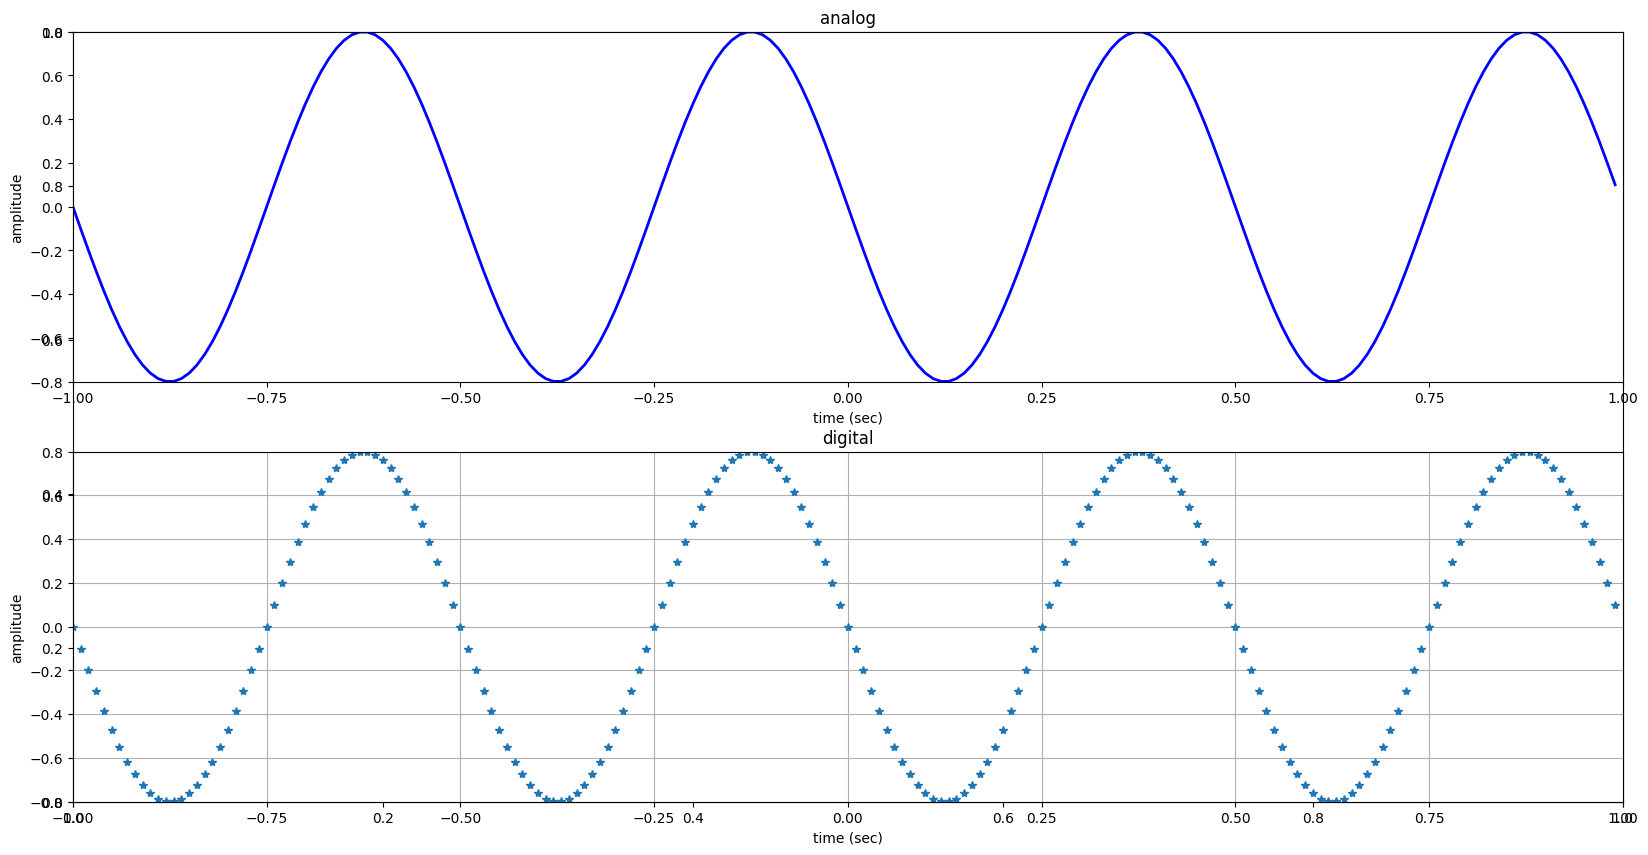

In [4]:
plt.subplots(figsize=(20, 10))

ax1=plt.subplot(2, 1, 1)
ax1.plot(t, x, 'b',lw=2)
plt.axis([-1,1,-0.8,0.8])
ax1.set_title('analog')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('amplitude')

ax2=plt.subplot(212, sharex=ax1)
ax2.plot(t, x, '*', lw=2)
plt.axis([-1,1,-0.8,0.8])
plt.grid(True)
plt.title('digital')
plt.xlabel('time (sec)')
plt.ylabel('amplitude')

## Primeira Intuição


|                |                                       |
| ---------------- | --------------------------------------- |
| **First Step** | ![primeiro passo](pictures/step.jpeg) |

<p></p>

> ### Algumas das propriedades do Audio Digital
>
> 1. Taxa de Amostragem (Sample Rate)
> 2. Volume
> 3. Tonalidade (Pitch)
> 4. Duração
<p></p>

----------

<p></p>

> 5. Quantidade de bits (Bit Depth)
> 6. Taxa de Bits (Bit Rate)
> 7. Armazenamento x estrutura de dados
> 8. Frame x Sample x Chunk Size


### Taxa de amostragem -  Sample Rate (sample frequency)

<p>Uma amostra ou sample é o estado original analógico da onda sonora em um certo periodo do tempo</p>
<p>Uma série de amostras conectadas descrevem um trecho de audio</p>

> Taxa de amostragem é o número de amostras por uma medida de tempo(normalmente em segundos), quando estamos captando um sinal continuo eanalógio para um sinal discreto e digital.

A `taxa de amostragem` também é chamada de:
  - Frequencia de amostragem(samplig rate)
  - Taxa de recuperação(recevery rate). 
  - Normalmente medido em HZ hertz. **41.200Hz**

In [72]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi
duracao = 1

taxa_amostragem = 44100
tempo1 = np.arange(start=0, stop=duracao, step=duracao/taxa_amostragem)
tempo2 = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False)

x1 = amplitude * np.cos(2 * np.pi * frequencia * tempo1 + fase_inicial)
x2 = amplitude * np.cos(2 * np.pi * frequencia * tempo2 + fase_inicial)

print(len(tempo1))
print(len(tempo2))

44100
44100


Text(0, 0.5, 'amplitude')

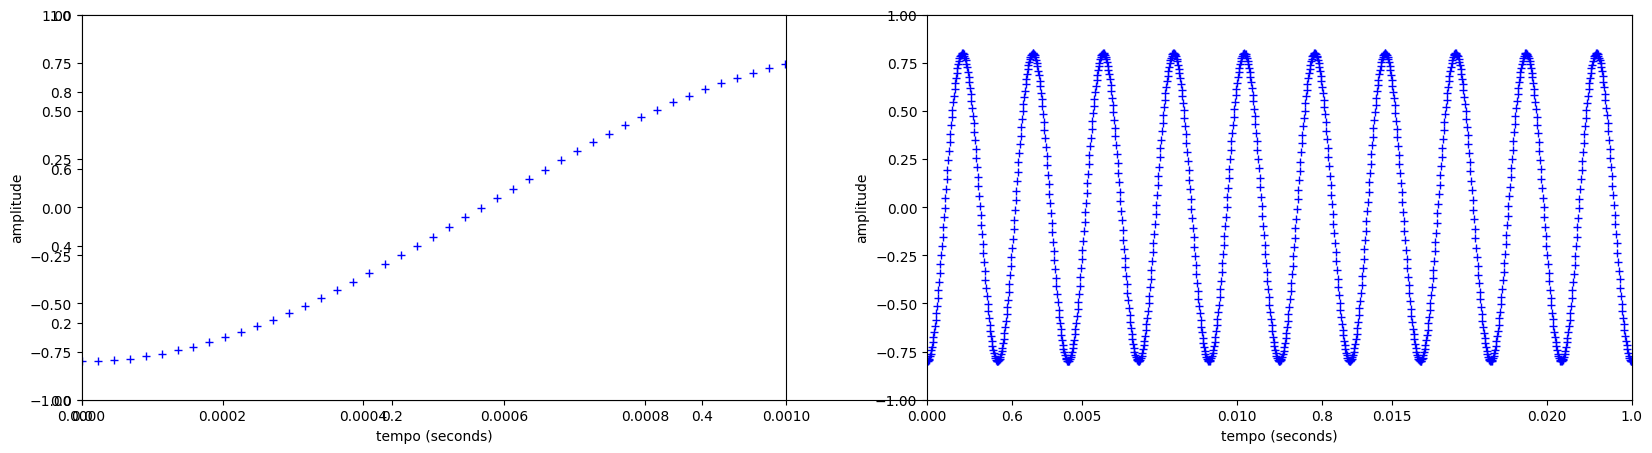

In [83]:
plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(tempo1, x1, 'b+', linewidth=2)
plt.axis([-.0, 1/1000, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')

plt.subplot(1,2,2)
plt.plot(tempo2, x2, 'b+', linewidth=2)
plt.axis([-.0, 1/44, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')


In [84]:
import IPython.display as ipd

ipd.display(ipd.Audio(data=x1, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=x2, rate=taxa_amostragem))

In [114]:
def draw_wave(tempo, audio, style, duracao, zoom, amplitude):
    plt.plot(tempo, audio, style, linewidth=2)
    plt.axis([-.0, duracao/zoom, -amplitude, amplitude])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

In [97]:
def create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem):
    vetor_tempo = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False)
    two_phi = 2 * np.pi

    x = amplitude * np.cos( two_phi * frequencia * vetor_tempo + fase_inicial)
    return vetor_tempo, x

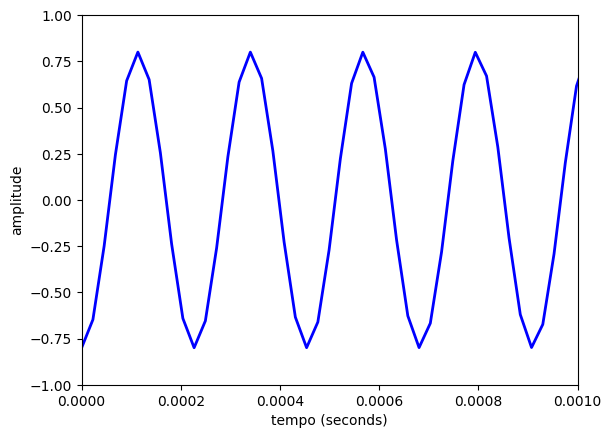

In [125]:
amplitude = .8
frequencia = 4400
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo, audio = create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem)
ipd.display(ipd.Audio(data=audio, rate=taxa_amostragem))
draw_wave(tempo, audio, 'b', duracao, 1000, amplitude+.2)